#### Namespaces

- It is nothing but a dictionary, which contains identifers(keys) and thier Objects(values)
a = 3, b = 4 -----------> {a:3,b:4}

#### Four types
- Builtin
- Global
- Encoding
- Local

- -------------------------

- If you observe clearly, there are two Namespace and scope in the image below.
- first scope is of global frame where namespace can be visualized as      {add: function, a : 3, b : 4}
- second scope is of function where namespace can be visualized as {x : 3, y : 4}
- None of the scopes can access other's namespace

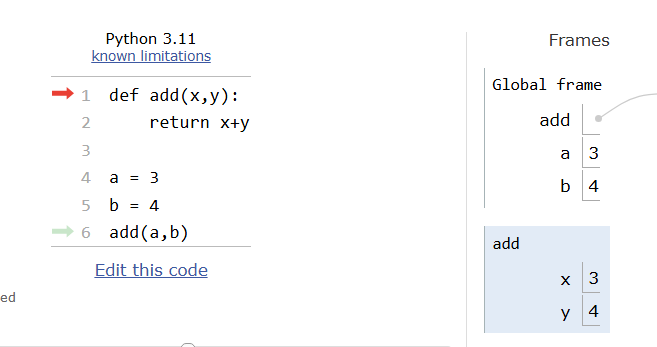

- LEGB rule
- local --> Encoding --> Global --> Builtin -->

In [2]:
a = 3     # Global scope


def temp():
    b = 2       # local scope
    print(b)
 
temp()
print(a)

2
3


In [4]:
a = 3     # Global scope


def temp():
    a = 2       # local scope
    print(a)
 
temp()
print(a)

# First print from local and then global

2
3


- Inshort the searching goes in this order local --> Encoding --> Global --> Builtin

In [5]:
a = 3     # Global scope


def temp():
    # a = 2       # local scope
    print(a)
 
temp()
print(a)

# First the intrepretter will serch for a in local if not available search for then global and print it

3
3


In [ ]:
a = 3     # Global scope


def temp():
    # a = 2       # local scope
    a = a+1       # Changes 
    print(a)
 
temp()
print(a)

# Changes are not allowed in this way.

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [30]:
a = 3     # Global scope


def temp():
    # a = 2       # local scope
    global a
    a = a+1       # Changes 
    print(a)
 
temp()
print(a)

# Changes are allowed in this way, we can use global key word **Not recommended**

4
4


In [33]:
def temp():
    # a = 2       # local scope
    global a
    a = 1       # will be in global scope 
    print(a)
 
temp()
print(a)

# we can add values in global scope's namespace from local scope  ** Not recomnmended**

1
1


In [36]:
def temp(x):
    print(x)       #  here "x" is local 

a = 5              # "a" is Global
temp(5)
print(a)

5
5


- Builtin

In [38]:
import builtins 
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BaseExceptionGroup', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'ExceptionGroup', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'S

- Built-in scope is where all the default Python functions, types, and exceptions live
- They're always available, no need to import anything.

- We can change the name of our builtin functions 

In [40]:
l = [1,2,3]
len(l)          # builtin

3

- but

In [42]:
l = [1,2,3]

def len(a):
    return f"hello {a}"

len(l)

'hello [1, 2, 3]'

- We changed the functionality of len
- If we observe closely, our intrepretter is searching for "len", first in global and it was avaialable so it did not go till builtin to get the exact "len" function

- Hence it is not recommended to make our functions with the builtin function's names

- Enclosing

In [44]:
def outer():
    def inner():
        print('inner function')
    inner()
    print('outer function')


outer()
print('main')

inner function
outer function
main


- if we observe clearly the outer funciton is calling inner funciton because of which the "inner function" is printed first followed by "outer funciton" and then "main"

- Here the "main" is globla scope "inner" is local scope and "outer" is enclosing scope

In [45]:
def outer():
    a = 3
    def inner():
        a = 4
        print(a)
    inner()
    print('outer function')

a = 1
outer()
print("main")

4
outer function
main


- Local is accessed first

In [46]:
def outer():
    a = 3
    def inner():
        print(a)
    inner()
    print('outer function')

a = 1
outer()
print("main")

3
outer function
main


- if not in local, it will go to Enclosing

In [47]:
def outer():
    def inner():
        print(a)
    inner()
    print('outer function')

a = 1
outer()
print("main")

1
outer function
main


- If not in local, if not in enclosing, then it is fetching from global

- If it is not avaialabe in neither local,enclosing, global it will search in builtin and give the output
- If it is not available in builtin then we will get an error

- If we have multiple nested functions,, the inner most function becomes local all other functions become enclosing_1, enclosing_2 and so on..

In [52]:
def outer():
    a = 1
    def inner():
        nonlocal a          # same like "global" keyword we can use "nonlocal" key word to make changes 
        a = a + 1           # changing in local 
        print("inner",a)
    inner()
    print('outer',a)
a =1
outer()
print("main")

# Not recommended, not a good practice

inner 2
outer 2
main


#### Decorator
- Decorator is a function that takes another function as input and extends or modifies its behavior without changing its original code.
- It’s like putting a wrapper around a function to add extra functionality — logging, timing, authentication, etc.
- This happens becasue python functions are 1st class citizens

#### Types
- Built in ( already availabel ) *@property*, *@classmethod* and etc..
- user defined 

In [53]:
def func():
    print('hi')

a = func()
a

hi


In [55]:
def func():
    print('hi')

del func                # we can even delete the functions
func

NameError: name 'func' is not defined

In [59]:
def m1(func,num):
    return func(num)

def sqr(num):
    return num**2

m1(sqr,2)

4

In [70]:
# simple example of decorator

def my_decorator(func):
    def wrapper():
        print("*"*50)
        func()
        print("*"*50)
    return wrapper()

def yah():
    print("yah")

my_decorator(yah)

**************************************************
yah
**************************************************


- Basicall, even when the my_decorator has already returned wrapper, it is ideally gone from the memory, but wrapper function can still access the "func" function, which is a variable of my_decorator

- A  better syntax 

In [76]:
def my_decorator(func):
    def wrapper():
        print("*"*50)
        func()
        print("*"*50)
    return wrapper()

@my_decorator
def yahi():
    print("yah")

**************************************************
yah
**************************************************


- A Decorator which prints time taken for execution of a function

In [77]:
import time

In [91]:
def timer(func):
    def wrapper():
        start  = time.time()
        func()
        return f"Time taken for executing the function is: {time.time() - start} seconds"
    return wrapper

@timer
def somefunc():
    time.sleep(1.5)
    print("wokeup after 1.5 seconds")
    

somefunc()

wokeup after 1.5 seconds


'Time taken for executing the function is: 1.5009961128234863 seconds'

In [108]:
def some_decorator(func):
    def wrapper():
        print(f'A decorator for "{func.__name__}" function is applied')
        func()
    return wrapper

@some_decorator
def display_func():
    print("display function's output")

In [109]:
display_func()

A decorator for "display_func" function is applied
display function's output


In [112]:
def some_decorator(func):
    def wrapper():
        print(f'A decorator for "{func.__name__}" function is applied')
        func()
    return wrapper

@some_decorator
def sqr(x):
    print(x**2)

sqr(4)

TypeError: some_decorator.<locals>.wrapper() takes 0 positional arguments but 1 was given

- See when we have called wrapper inside decorator, it is calling the func(), but wrapper doesn't have any input so code broke

- basically our decorator will only work where there is no input needed

- use *args

In [114]:
def some_decorator(func):
    def wrapper(*args):
        print(f'A decorator for "{func.__name__}" function is applied')
        func(*args)
    return wrapper

@some_decorator
def sqr(x):
    print(f"the sqr of {x} is {x**2}")

sqr(4)

A decorator for "sqr" function is applied
the sqr of 4 is 16


In [115]:
def some_decorator(func):
    def wrapper(*args):
        print(f'A decorator for "{func.__name__}" function is applied')
        func(*args)
    return wrapper

@some_decorator
def add_(x,y):
    print(f"the adddition of {x} and {y} is {x+y}")

add_(4,5)

A decorator for "add_" function is applied
the adddition of 4 and 5 is 9


In [127]:
def check_decorator(func):
    def wrapper(*args):
        if type(*args) != int:
            print('can not work with given input')            
        else:
            func(*args)
    return wrapper
            


@check_decorator
def sqr(x):
    print(f'The square of {x} is {x**2}')


sqr('2')
sqr(2)


can not work with given input
The square of 2 is 4


- What if I want to make a generalized decorator which takes input and can perform some checks on the given input from user

In [160]:
def type_decorator(data_type):
    def outer_wrapper(func):
        def inner_wrapper(*args):
            if not all(isinstance(arg,data_type) for arg in args):
                print("can not move ahead")
            else:
                func(*args)
        return inner_wrapper
    return outer_wrapper

@type_decorator(int)
def sqr(x):
    print(f'The square of {x} is {x**2}')

@type_decorator(str)
def someting(y):
    print(f'The input string is "{y}"')

@type_decorator(int)
def addtn(a,b):
    print(f'Sum of {a} and {b} is {a+b}')

In [161]:
sqr(3)
someting('hello')
addtn(2,3)

The square of 3 is 9
The input string is "hello"
Sum of 2 and 3 is 5


In [162]:
sqr('hello')
someting(3)
addtn('1',3)

can not move ahead
can not move ahead
can not move ahead
